In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
import matplotlib as mpl

import numpy as np
import numpy.linalg as la

import time
import glob,os

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from sklearn.manifold import TSNE
from PIL import Image
from imageio import imread

font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
prop = mfm.FontProperties(fname=font_path)

In [15]:
data_dir ='/home/wonton/jiayi/projects/Chinese-charactor-classification/commoncharacter>500'
data_saving_path = data_dir + "_trained_result_image_24/"

## loading data

In [60]:
# labels
L = np.load(data_saving_path + "/data_for_bokeh/L.npy")
# data from torch
tor_data = np.load("./commoncharacter>500_trained_result_image_24/data_for_bokeh/tor_data.npy")
# data after tsne
X_embedded = np.load(data_saving_path + "/data_for_bokeh/X_embedded.npy")
#square difference from the center
SE = np.load("./commoncharacter>500_trained_result_image_24/data_for_bokeh/SE.npy")

subgroup_hier= np.load("./commoncharacter>500_trained_result_image_24/data_for_bokeh/subgroup_hier.npy", allow_pickle=True)

### load k-mean results

In [21]:
U = np.load("./commoncharacter>500_trained_result_image_24/k_mean_15classes.npy",allow_pickle=True)
cl = U.item().get("cl")
c =  U.item().get("c")
k =  U.item().get("k")

In [ ]:
### print out k-mean results

In [51]:
text = ''
array_text = []
for i in range(k):
    print("group%d:"%i, np.array(L)[np.where(cl.numpy()==i)])
    print(str(np.array(L)[np.where(cl.numpy()==i)]))
    text += "group%d:"%i + str(np.array(L)[np.where(cl.numpy()==i)]) +'\r\n'
    array_text.append(np.array(L)[np.where(cl.numpy()==i)])



group0: ['囧' '向' '匯' '匴' '圄' '匾' '呴' '圁' '卩' '囮' '图' '固' '囪' '周' '囿' '圚' '両' '冏'
 '喦' '因' '囹' '司' '凸' '圈' '凤' '凵' '圆' '匈' '函' '囵' '囷' '圉' '圜' '冈' '凶' '凼'
 '同' '圔' '圖' '囗' '內' '匐' '凹' '凰' '圂' '囫' '叵' '刂' '围' '厔' '园' '口' '困' '匟'
 '囤' '圃' '呂' '匜' '卤' '厨' '团' '回' '圊' '囡' '囝' '匽' '咼' '囚' '圇' '國' '圛' '囥'
 '問' '囱' '圍' '壓' '囟' '厎' '兩' '園' '凾' '匱' '圓' '區' '圌' '四' '夙' '国' '團']
['囧' '向' '匯' '匴' '圄' '匾' '呴' '圁' '卩' '囮' '图' '固' '囪' '周' '囿' '圚' '両' '冏'
 '喦' '因' '囹' '司' '凸' '圈' '凤' '凵' '圆' '匈' '函' '囵' '囷' '圉' '圜' '冈' '凶' '凼'
 '同' '圔' '圖' '囗' '內' '匐' '凹' '凰' '圂' '囫' '叵' '刂' '围' '厔' '园' '口' '困' '匟'
 '囤' '圃' '呂' '匜' '卤' '厨' '团' '回' '圊' '囡' '囝' '匽' '咼' '囚' '圇' '國' '圛' '囥'
 '問' '囱' '圍' '壓' '囟' '厎' '兩' '園' '凾' '匱' '圓' '區' '圌' '四' '夙' '国' '團']
group1: ['嚕' '咶' '嘒' '唁' '嗒' '咭' '唈' '嘎' '哠' '啅' '咯' '嗔' '啥' '啿' '喑' '喰' '嗿' '嘄'
 '嗝' '嗆' '嚾' '唭' '嚐' '喟' '唄' '喝' '堕' '嚎' '唷' '喂' '唅' '囋' '喒' '嗅' '咱' '哏'
 '唱' '啃' '嘳' '噲' '喀' '喨' '唶' '咍' '嗄' '哐' '嘈' '啗' '喧' '啍' '啽' '嗚' '嘔' '喎'
 '噌' '唔' '噶' '咡' '喈' '墮' '咺' '噂' '哈' '嗩' 

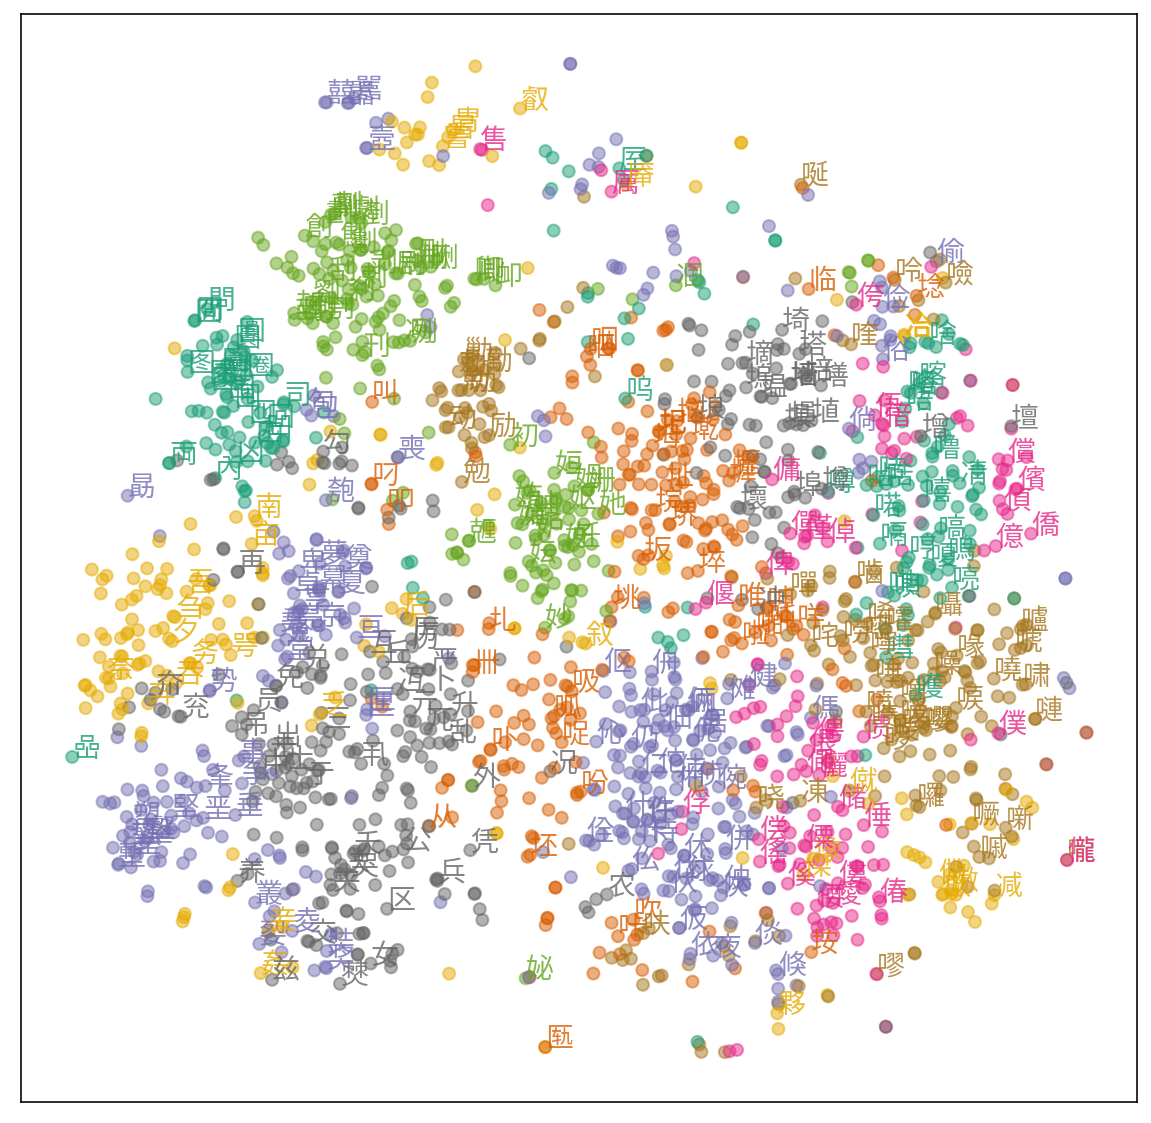

In [28]:
fig = plt.figure(figsize=(10,10))
cmap = plt.cm.get_cmap("Dark2", k)
ax = fig.add_subplot(111)
ax.scatter(X_embedded[:,0], X_embedded[:,1], 
           c = cmap(cl.cpu().numpy()), alpha = 0.5)
cmap = plt.cm.get_cmap("Dark2", k)
for i in range(len(X_embedded[:,0])):
   
    if i%5==0:
        ax.text(X_embedded[i,0], X_embedded[i,1],
                 L[i], color = cmap(cl.cpu()[i].numpy()),
                 fontproperties=prop, size = 14, alpha = 0.8)

plt.xticks([],[])
plt.yticks([],[])
plt.show()
# plt.savefig(data_saving_path + "/cluster_results_Tsn_k_%d.png"%k)

# Putting meaning into the node in graph

In [30]:
import pinyin
import pinyin.cedict
import textwrap
print(pinyin.get(L[0]))
s = str(pinyin.cedict.translate_word(L[0]))
print(textwrap.fill(s,25))

jiǒng
['variant of 冏[jiong3]',
'used as emoticon
("smiley") meaning
embarrassed, sad :-(,
depressed or frustrated']


In [31]:
defs = []
ps = []
nones = 0
filterL = []
for i in range(len(L)):
    
    s = str(pinyin.cedict.translate_word(L[i]))
    definition = textwrap.fill(s,35)   
    
    if definition == 'None':
        nones += 1
    else:
        filterL.append(i)
    
        Pinyin = str(pinyin.get(L[i]))
        defs.append(definition)
        ps.append(Pinyin)


# Plot using Bokeh

In [53]:
from bokeh.transform import linear_cmap
from bokeh.palettes import Category20
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, Plot, ColorBar, OpenURL, TapTool, CustomJS,Range1d,  Label
from bokeh.plotting import figure, save
from bokeh.models.glyphs import ImageURL
from bokeh.layouts import row

from random import random
from bokeh.models import CustomJS, ColumnDataSource, Row, Column
from bokeh.plotting import figure, show, curdoc
from bokeh.models.widgets import Button, TableColumn, Div,DataTable,TextInput


In [44]:
den_add = "/home/wonton/jiayi/projects/Chinese-charactor-classification/commoncharacter>500_trained_result_image_24/dengrograms"

files = [den_add +'/group_%d.png'%i for i in colors]

In [58]:
TOOLTIPS = """     
    <div> 
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Pinyin:</span>
            <span style="font-size: 15px; color: #696;">(@pinyin)</span>
        </div>
        <div>
            <span style="font-size: 15px;">Class</span>
            <span style="font-size: 15px; color: #696;">(@colors)</span>
            
        </div>
        <div>
            <span style="font-size: 15px;">Def</span>
            <span style="font-size: 10px;white-space: pre-line">(@meaning)</span>
        </div>     
               
    </div>
"""

In [81]:
# CALLBACKS
def callback_print(source=None, window=None):
    user_input = str(cb_obj.value)
    welcome_message = 'You have selected: ' + user_input
    source.trigger('change')

In [115]:
[x=='嘎' for x in L[filterL].tolist()]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [120]:
colors = cl.cpu()[filterL].tolist()
classes = colors.copy()
print(max(colors))
mapper = linear_cmap(field_name='colors', palette=Category20[max(colors)] ,low=min(colors) ,high=max(colors))

# output_file("plot1.html")

s1 = ColumnDataSource(data=dict(
    x=X_embedded[:,0][filterL],
    y=X_embedded[:,1][filterL],
    desc=np.array(L)[filterL].tolist(),
    
    colors = colors,
    meaning = defs,
    pinyin = ps,
    sizes = list(np.max(SE)-np.array(SE)[filterL]),
    classes = classes,
    images_files = files,
   
))

p = figure(plot_width=650, plot_height=500, tooltips=TOOLTIPS, tools="tap", toolbar_location="above",
           title="Cluster of Chinese characters (k-means visualized by t-SNE)")

p.circle('x', 'y', size = 'sizes', fill_color=mapper, line_color=None, fill_alpha=0.75, source=s1)
color_bar = ColorBar(color_mapper=mapper['transform'], width=8,  location=(0,0))

p.add_layout(color_bar, 'right')

s2 = ColumnDataSource(data=dict(x=[], y=[], images_files = []))
p2 = figure(plot_width=400, plot_height=400,  x_range=(-50, 50), y_range=(-50, 50), \
            title="viewing words within the same class")

p2.image_url(url="images_files", source = s2, x=-60, y=60, w=120, h=120)

s1.selected.js_on_change('indices', CustomJS(args=dict(s1=s1, s2=s2), code="""
        var inds = cb_obj.indices;
        var d1 = s1.data;
        var d2 = s2.data;
        d2['x'] = []
        d2['y'] = []
        d2['images_files'] = []
        for (var i = 0; i < inds.length; i++) {
            d2['x'].push(d1['x'][inds[i]])
            d2['y'].push(d1['y'][inds[i]])
        d2['images_files'].push(d1['images_files'][inds[0]])
        }
        s2.change.emit();
    """)
)

data = dict(
        classes=range(15),
        words=subgroup_hier_array,
        num = [len(array_text[i]) for i in range(15)]
    )
source = ColumnDataSource(data)

columns = [
        TableColumn(field="num", title="# of characters",width=10),
        TableColumn(field="words", title="characters in each class with subclasses"),
    ]

data_table = DataTable(source=source, columns=columns, width=1200, height=500)



cb_click = CustomJS(args=dict(s1=s1), code="""
    var user_input = cb_obj.get('value')
    var d1 = s1.data
    desc = d1['desc']
    
    for (var i = 0; i < d1['x'].length; i++) {
        if(desc[i] == user_input) {
            var idx = i;
            break;
           } 
        }
        
    l_selected = s1.selected
    l_selected['1d'].indices = idx
    s1.selected = l_selected
    s1.change.emit()
    """)


text_input = TextInput(value="吴", title="Search character here:",callback = cb_click)
#p.add_tools(TapTool(callback=cb_click))    
    
layout = Column(text_input, row(p, p2), data_table)
# save(layout)
show(layout)

# show(p)


14


In [109]:
from bokeh.layouts import layout, column
from bokeh.models.widgets import Div
from bokeh.io import show
from bokeh.models import TextInput, CustomJS, TextAreaInput

ti = TextInput(title="ti")
callback = CustomJS(code="""console.log("hello ti");""")
ti.js_on_change("value", callback)

tia = TextAreaInput(title="tia")
callback = CustomJS(code="""console.log("hello tia");""")
tia.js_on_change("value", callback)


In [101]:
from bokeh.models import ColumnDataSource, TapTool
source = ColumnDataSource(data=dict(x=df.x, y=df.y))
p=figure(tools="reset,tap")
p.circle("x", "y", source=source)
cb_click = CustomJS(args=dict(source=source), code="""
    l_selected=source.selected
    // create an array idx that contains the indices of the points you want to select
    l_selected['1d'].indices=idx
    source.selected=l_selected
""")
p.add_tools(TapTool(callback=cb_click))
p.show()

NameError: name 'df' is not defined

In [73]:
subgroup_hier_array =[]
for i in range(15):
    subgroup_hier_array.append(np.array(subgroup_hier.item()[i]))

In [68]:
array_text

[array(['囧', '向', '匯', '匴', '圄', '匾', '呴', '圁', '卩', '囮', '图', '固', '囪',
        '周', '囿', '圚', '両', '冏', '喦', '因', '囹', '司', '凸', '圈', '凤', '凵',
        '圆', '匈', '函', '囵', '囷', '圉', '圜', '冈', '凶', '凼', '同', '圔', '圖',
        '囗', '內', '匐', '凹', '凰', '圂', '囫', '叵', '刂', '围', '厔', '园', '口',
        '困', '匟', '囤', '圃', '呂', '匜', '卤', '厨', '团', '回', '圊', '囡', '囝',
        '匽', '咼', '囚', '圇', '國', '圛', '囥', '問', '囱', '圍', '壓', '囟', '厎',
        '兩', '園', '凾', '匱', '圓', '區', '圌', '四', '夙', '国', '團'], dtype='<U1'),
 array(['嚕', '咶', '嘒', '唁', '嗒', '咭', '唈', '嘎', '哠', '啅', '咯', '嗔', '啥',
        '啿', '喑', '喰', '嗿', '嘄', '嗝', '嗆', '嚾', '唭', '嚐', '喟', '唄', '喝',
        '堕', '嚎', '唷', '喂', '唅', '囋', '喒', '嗅', '咱', '哏', '唱', '啃', '嘳',
        '噲', '喀', '喨', '唶', '咍', '嗄', '哐', '嘈', '啗', '喧', '啍', '啽', '嗚',
        '嘔', '喎', '噌', '唔', '噶', '咡', '喈', '墮', '咺', '噂', '哈', '嗩', '嘱',
        '噙', '嗐', '嘓', '呫', '哼', '凔', '噎', '噜', '噫', '咆', '哨', '咀', '噹',
        '吃', '嗬', '喳', '噆', '呜', '咁', '喭', '噣'

In [420]:
print([len(array_text[i]) for i in range(15)])

[89, 106, 143, 110, 225, 161, 160, 79, 115, 142, 64, 190, 39, 83, 244]


In [90]:
# myapp.py

from random import random

from bokeh.layouts import column
from bokeh.models import Button
from bokeh.palettes import RdYlBu3
from bokeh.plotting import figure, curdoc

# create a plot and style its properties
p = figure(x_range=(0, 100), y_range=(0, 100), toolbar_location=None)
p.border_fill_color = 'black'
p.background_fill_color = 'black'
p.outline_line_color = None
p.grid.grid_line_color = None

# add a text renderer to our plot (no data yet)
r = p.text(x=[], y=[], text=[], text_color=[], text_font_size="20pt",
           text_baseline="middle", text_align="center")

i = 0

ds = r.data_source

# create a callback that will add a number in a random location
def callback():
    global i

    # BEST PRACTICE --- update .data in one step with a new dict
    new_data = dict()
    new_data['x'] = ds.data['x'] + [random()*70 + 15]
    new_data['y'] = ds.data['y'] + [random()*70 + 15]
    new_data['text_color'] = ds.data['text_color'] + [RdYlBu3[i%3]]
    new_data['text'] = ds.data['text'] + [str(i)]
    ds.data = new_data

    i = i + 1

# add a button widget and configure with the call back
button = Button(label="Press Me")
button.on_click(callback)

# put the button and plot in a layout and add to the document
curdoc().add_root(column(button, p))
